In [1]:
import jax
import jax.numpy as jnp
import functools

In [26]:
@functools.partial(jax.vmap, in_axes=(None, None, 0))
def f(theta, c, x):
    return jnp.dot(theta, x) + c


x = jnp.array([[1.0], [2.0]])
theta = jnp.array([1.0])
c = jnp.array([1.0])

y_true = jnp.array([[4.0], [5.0]])
y = f(theta, c, x)
print(y)

[[2.]
 [3.]]


In [6]:
def misfit(theta, c, x, y):
    return jnp.mean((f(theta, c, x) - y) ** 2)


print(misfit(theta, c, x, y_true))

4.0


In [24]:
grad_misfit = jax.grad(misfit, argnums=(0, 1))

lr = 1e-1

for i in range(1, 1000):
    grad_theta, grad_c = grad_misfit(theta, c, x, y_true)
    theta = theta - lr * grad_theta
    c = c - lr * grad_c

    if i % 100 == 0:
        print(f"Misfit at step {i}: {misfit(theta, c, x, y_true)}")

Misfit at step 100: 0.008344216272234917
Misfit at step 200: 0.0004413587739691138
Misfit at step 300: 2.3346416128333658e-05
Misfit at step 400: 1.2346501989668468e-06
Misfit at step 500: 6.532232532663329e-08
Misfit at step 600: 3.4524418879300356e-09
Misfit at step 700: 1.815578798414208e-10
Misfit at step 800: 9.094947017729282e-12
Misfit at step 900: 4.462208380573429e-12


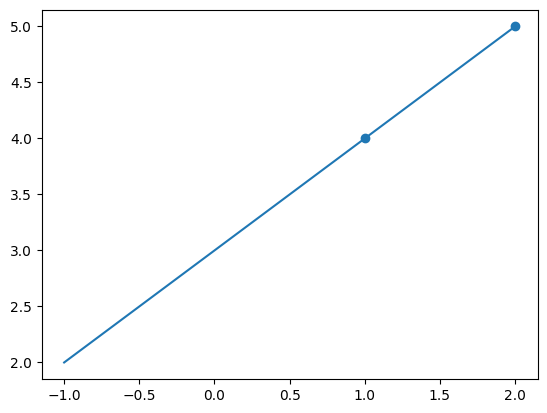

In [25]:
import matplotlib.pyplot as plt

plt.scatter(x, y_true)
xs = jnp.linspace(-1, 2, 50)
ys = f(theta, c, xs)
plt.plot(xs, ys)

- Show *stochastic* gradient descent with larger data set 
- Also show use of `flax` and `optax` libraries with adaptive optimisers, e.g., Adam.